Análise de 'atos.csv' da Barra Funda (janeiro de 2017 a março de 2021)

Versão: 2 maio 2021

@jespimentel

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import hashlib
from matplotlib import pyplot as plt
import seaborn as sns 
from IPython.display import display, HTML

In [2]:
# Leitura do arquivo 'atos.csv' para a criação do Dataframe
atos = pd.read_csv ('./original_esaj_bf/atos.csv', sep = ';', encoding='ISO-8859-1', 
                    error_bad_lines=False, warn_bad_lines= False, low_memory = False, 
                    parse_dates=['Disponibilização', 'Data da intimação'], dayfirst=True)

In [3]:
# Tratamento da data de 'Disponibilização' para permitir a análise por mês
atos['mês_ano'] = pd.to_datetime(atos['Disponibilização']).dt.to_period('M')
atos.set_index('mês_ano', inplace=True)

In [4]:
# Função: Cálculo do hash MD5 para a anonimização do Dataset
def extrai_hash(nome):
    return hashlib.md5(str(nome).encode()).hexdigest()

In [5]:
# Anonimização
atos['Id_colega'] = atos['Recebido por'].apply(lambda x: extrai_hash(x))

In [6]:
# Grava arquivo texto relacionando 'Recebido por' com o 'Id_colega' (hash criado)
with open ('Id_colega.txt', 'w') as arquivo:
    for nome in atos['Recebido por'].unique():
        arquivo.write(str(extrai_hash(nome)) +'\t'+ (str(nome)).upper() + '\n')

In [7]:
# Delimitação do período da análise
periodo = ['2017-01', '2021-03']
criterio = (atos.index >= periodo[0])&(atos.index <= periodo[1])
atos_periodo = atos[criterio]

In [8]:
# Adequação e exibição de amostra do dataframe
atos['Recebido por'] = atos['Recebido por'].apply(lambda x: str(x).upper())
selecao_de_colunas = ['Número do processo', 'Foro', 'Vara', 'Especialização', 'Cargo',
       'Disponibilização', 'Prazo processual', 'Movimentação',
       'Teor da intimação', 'Classe principal', 'Assunto principal',
       'Situação', 'Data da intimação', 'Id_colega']
atos_periodo[selecao_de_colunas].sample(5)

,Número do processo,Foro,Vara,Especialização,Cargo,Disponibilização,Prazo processual,Movimentação,Teor da intimação,Classe principal,Assunto principal,Situação,Data da intimação,Id_colega
mês_ano,,,,,,,,,,,,,,
2021-02,1518060-78.2019.8.26.0228,Foro Central Criminal Barra Funda,15ª Vara Criminal,Criminal,054º PROMOTOR DE JUSTIÇA,2021-02-26,0 dias,Ato Ordinatório ? Intimação ? Portal ? Ministé...,Ato Ordinatório - Ministério Público - Multa P...,Ação Penal - Procedimento Ordinário,Furto,Cumprida,2021-02-27,c4b55d71d3dad5e19c4e3a9481199118
2020-04,0010194-07.2017.8.26.0635,Foro Central Criminal Barra Funda,22ª Vara Criminal,Criminal,094º PROMOTOR DE JUSTIÇA,2020-04-13,10 dias,Ato Ordinatório - Não Publicável,Vista ao Ministério Público.,Ação Penal - Procedimento Ordinário,Furto,Cumprida,2020-04-13,dafb2b9f3dddc056dd3632b0c2f5b73b
2018-11,0066678-51.2017.8.26.0050,Foro Central Criminal Barra Funda,2ª Vara das Execuções Criminais,Execuções Criminais,016º PROMOTOR DE JUSTIÇA,2018-11-28,10 dias,Ato Ordinatório - Não Publicável,Vista ao Ministério Público.,Execução da Pena,Prestação de Serviços à Comunidade,Cumprida,2018-11-29,6d98efd2861f63dfdc7f1d20c7c3bcaa
2020-01,1536089-31.2019.8.26.0050,Foro Central Criminal Barra Funda,DIPO 3 - Seção 3.2.1,Criminal - 27ª VCrim,117º PROMOTOR DE JUSTIÇA,2020-01-14,6 dias,Ato Ordinatório - Não Publicável,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Ameaça,Cumprida,2020-01-15,637d2f3e37a5469aed4ee971f4a34cc8
2021-02,1501656-64.2020.8.26.0050,Foro Central Criminal Barra Funda,DIPO 3 - Seção 3.2.1,Criminal - 29ª VCrim,116º PROMOTOR DE JUSTIÇA,2021-02-01,6 dias,Ato Ordinatório - Não Publicável,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Falsidade ideológica,Cumprida,2021-02-01,3816714deebb744ab3df74194f604baa


In [9]:
atos_periodo.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1286264 entries, 2021-03 to 2017-01
Freq: M
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Número do processo  1286264 non-null  object        
 1   Foro                1286264 non-null  object        
 2   Vara                1286264 non-null  object        
 3   Especialização      1286046 non-null  object        
 4   Cargo               1286028 non-null  object        
 5   Disponibilização    1286264 non-null  datetime64[ns]
 6   Prazo processual    1286264 non-null  object        
 7   Movimentação        1286264 non-null  object        
 8   Teor da intimação   1286262 non-null  object        
 9   Classe principal    1286264 non-null  object        
 10  Assunto principal   1285935 non-null  object        
 11  Situação            1286264 non-null  object        
 12  Tarjas              278696 non-null   object        
 1

In [10]:
atos_periodo['Vara'].unique()

array(['Vara Foro Cent. de Viol. Dom. e Fam. Cont. Mulher',
       '5ª Vara das Execuções Criminais', '12ª Vara Criminal',
       '9ª Vara Criminal', '17ª Vara Criminal', '21ª Vara Criminal',
       '3ª Vara das Execuções Criminais',
       'SANCTVS - Setor de Atend. de Crimes contra Infante, Idoso, Deficiente e Vít. Tráf. Int. Pessoas',
       '8ª Vara Criminal', '23ª Vara Criminal', '6ª Vara Criminal',
       '30ª Vara Criminal', '1ª Vara Criminal', '2ª Vara Criminal',
       'Vara do Juizado Especial Criminal',
       '1ª Vara das Execuções Criminais', '28ª Vara Criminal',
       '20ª Vara Criminal',
       '1ª Vara de Crimes Tributários, Organização Criminosa e Lavagem de Bens e Valores da Capital',
       '2ª Vara das Execuções Criminais', '16ª Vara Criminal',
       'DIPO 4 - Seção 4.2.3', '7ª Vara Criminal', '13ª Vara Criminal',
       '5ª Vara Criminal', 'DIPO 4 - Seção 4.2.2', '4ª Vara Criminal',
       'DIPO 3 - Seção 3.1.2', '18ª Vara Criminal', '22ª Vara Criminal',
       '

In [11]:
# Seleção das Varas

sel_dipo = ['DIPO 3 - Seção 3.2.1', 'DIPO 3 - Seção 3.1.2', 'DIPO 3 - Seção 3.2.3',
            'DIPO 4 - Seção 4.2.1', 'DIPO 3 - Seção 3.1.1', 'DIPO 4 - Seção 4.1.1',
            'DIPO 4 - Seção 4.1.2', 'DIPO 3 - Seção 3.2.2', 'DIPO 4 - Seção 4.2.3',
            'DIPO 4 - Seção 4.2.2']

sel_varas_criminais = ['8ª Vara Criminal' , '9ª Vara Criminal', '20ª Vara Criminal',
                       '26ª Vara Criminal','32ª Vara Criminal', '10ª Vara Criminal',  
                       '22ª Vara Criminal','28ª Vara Criminal', '23ª Vara Criminal', 
                       '18ª Vara Criminal', '1ª Vara Criminal', '21ª Vara Criminal', 
                       '4ª Vara Criminal' ,'19ª Vara Criminal', '24ª Vara Criminal', 
                       '5ª Vara Criminal' ,'27ª Vara Criminal', '16ª Vara Criminal', 
                       '17ª Vara Criminal','2ª Vara Criminal' , '11ª Vara Criminal', 
                       '25ª Vara Criminal','29ª Vara Criminal', '31ª Vara Criminal', 
                       '3ª Vara Criminal' , '7ª Vara Criminal', '6ª Vara Criminal' ,
                       '13ª Vara Criminal','12ª Vara Criminal',' 15ª Vara Criminal', 
                       '30ª Vara Criminal','14ª Vara Criminal']

sel_varas_exec = ['4ª Vara das Execuções Criminais', '5ª Vara das Execuções Criminais',
                  '3ª Vara das Execuções Criminais', '1ª Vara das Execuções Criminais', 
                  '2ª Vara das Execuções Criminais', 'Departamento de Execução Criminal']

sel_varas_especializadas = ['Vara Foro Cent. de Viol. Dom. e Fam. Cont. Mulher',
                            'Vara do Juizado Especial Criminal','Anexo de Defesa do Torcedor - JECRIM',
                            'SANCTVS - Setor de Atend. de Crimes contra Infante, Idoso, Deficiente e Vít. Tráf. Int. Pessoas',
                            '1ª Vara de Crimes Tributários, Organização Criminosa e Lavagem de Bens e Valores da Capital',
                            '2ª Vara de Crimes Tributários, Organização Criminosa e Lavagem de Bens e Valores da Capital']


In [12]:
# Interações mensais com o eSAJ por cargo
grouped = atos_periodo.groupby(['mês_ano','Cargo'])["Recebido por"].count().to_frame()
grouped 

Recebido por
mês_ano Cargo                                 
2017-01 001º PROMOTOR DE JUSTIÇA           258
        002º PROMOTOR DE JUSTIÇA           218
        003º PROMOTOR DE JUSTIÇA           249
        004º PROMOTOR DE JUSTIÇA           183
        005º PROMOTOR DE JUSTIÇA            81
...                                        ...
2021-03 125º PROMOTOR DE JUSTIÇA           308
        126º PROMOTOR DE JUSTIÇA           267
        127º PROMOTOR DE JUSTIÇA           310
        128º PROMOTOR DE JUSTIÇA           278
        140º PROMOTOR DE JUSTIÇA           515

[6678 rows x 1 columns]

In [13]:
# Interações mensais com o eSAJ por usuário
grouped1 = atos_periodo.groupby(['mês_ano','Id_colega'])['Recebido por'].count().to_frame()
grouped1 

Recebido por
mês_ano Id_colega                                     
2017-01 020595db1d1efecc4bc89a64524cea83             3
        02c0b81030c5f7e88828f3e3826dad2c            66
        0617a0235d9d96b9fac5a496ba92f9bb            86
        0988c4300787e1d936a545003ae632ea            82
        0ad132f1af19b36d9e44c7ffeec0b637           110
...                                                ...
2021-03 f916e320f16295c243697c8e9d49d048           347
        f93bc6b9ffcd1ae55021014f639f6941           302
        f9a33a42d3c6709b59111c9f63b78a89           369
        fca110d7f88fe01c20a8fe9fdbddfd81           189
        fe8e3f6fba7b9963b33cd4c3fbaf7d7a           449

[8290 rows x 1 columns]

In [14]:
# Funções genéricas para a plotagem dos gráficos de calor, barra e pizza

def plota_calor(dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    plt.figure(figsize=(10,6))
    plt.title(titulo)
    sns.heatmap(dados, cmap='YlOrBr')
    plt.savefig(titulo + '.jpg', dpi = 300, bbox_inches='tight')


def plota_barras (dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    plt.figure(figsize=(10,6))
    plt.title(titulo)
    dados.plot.bar()
    plt.savefig(titulo + '_barra.jpg', dpi = 200, bbox_inches='tight')
    
def plota_pizza (dados, assunto, periodo):
    titulo = assunto + ': de ' + periodo[0] + ' a ' + periodo[1]
    dados.plot.pie (autopct="%.2f %%", figsize=(10,10), ylabel='')
    plt.title(titulo)
    plt.show()
    plt.savefig(titulo + '_pizza.jpg', dpi = 200, bbox_inches='tight')  

In [15]:
# Análise do volume total de interações no período
total = atos_periodo.groupby('mês_ano')['Recebido por'].count().to_frame()
total

,Recebido por
mês_ano,
2017-01,9289
2017-02,9711
2017-03,13547
2017-04,10471
2017-05,14811
2017-06,13356
2017-07,14115
2017-08,15801
2017-09,13639


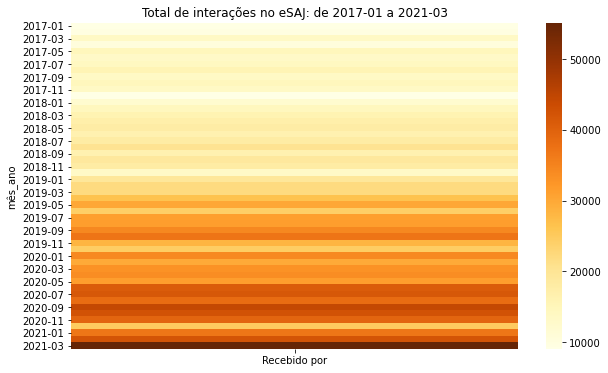

In [16]:
# Gráfico de calor 
plota_calor(total,'Total de interações no eSAJ', periodo)

In [17]:
# Exportação das informações para planilha Excel
with pd.ExcelWriter('eSAJ.xlsx') as writer:  
  grouped.to_excel(writer, sheet_name='Por cargo')
  grouped1.to_excel(writer, sheet_name='Por usuário')

In [18]:
# Criação de arquivos 'csv' para plotagem externa
grouped.to_csv('eSAJ_cargo.csv')
grouped1.to_csv('eSAJ_id.csv')
total.to_csv('eSAJ_total.csv')

In [19]:
display(HTML('<div class="flourish-embed flourish-heatmap" data-src="visualisation/5945528"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))

In [20]:
# DIPO e Varas Criminais
criterio = atos_periodo['Vara'].isin(sel_varas_criminais) | atos_periodo['Vara'].isin(sel_dipo)
contagem_de_assuntos = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos.head(50)

Assunto principal
Roubo                                                                                                        42697
Tráfico de Drogas e Condutas Afins                                                                           34352
Furto Qualificado                                                                                            28992
Estelionato                                                                                                  24247
Receptação                                                                                                   23707
Furto                                                                                                        22997
Inquirição de Testemunha                                                                                      5936
Crimes do Sistema Nacional de Armas                                                                           5079
Intimação                                                     

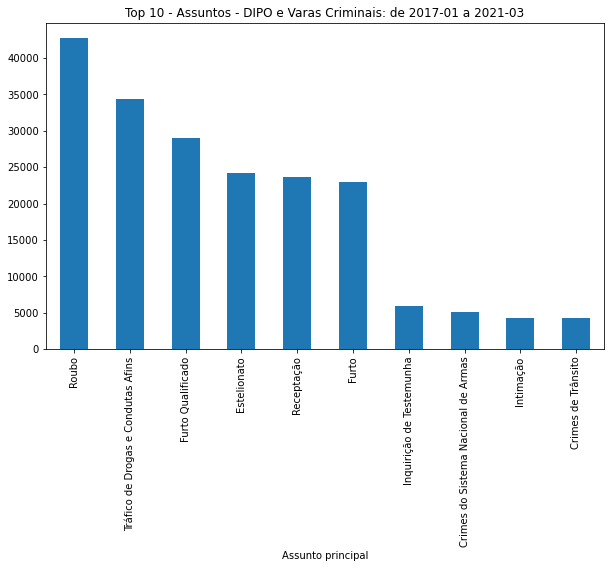

In [21]:
plota_barras (contagem_de_assuntos.nlargest(10), 'Top 10 - Assuntos - DIPO e Varas Criminais', periodo)

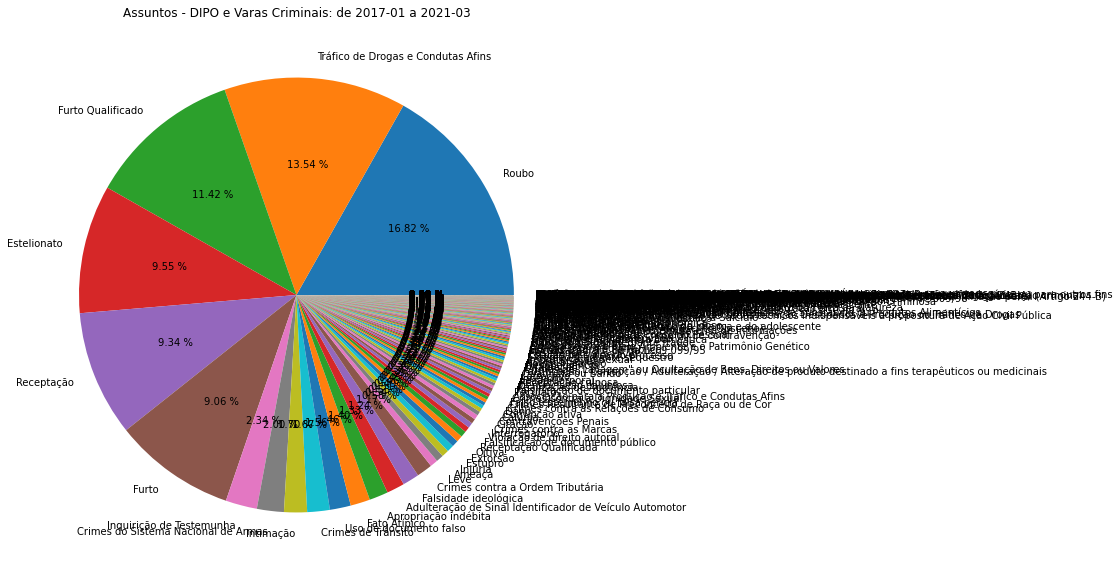

<Figure size 432x288 with 0 Axes>

In [22]:
plota_pizza(contagem_de_assuntos, 'Assuntos - DIPO e Varas Criminais', periodo)

In [23]:
# Vara das Execuções
criterio = atos_periodo['Vara'].isin(sel_varas_exec)
contagem_de_assuntos_exec = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_exec.head(30)

Assunto principal
Aberto                                                                     9812
Petição intermediária                                                      9374
Prestação de Serviços à Comunidade                                         6805
Pena de Multa                                                              5904
Regime inicial - Aberto                                                    5436
Livramento Condicional                                                     3490
Suspensão Condicional da Pena - SURSIS                                     1681
Internação                                                                 1417
Pena Restritiva de Direitos                                                 864
Pena Privativa de Liberdade                                                 812
Prestação Pecuniária                                                        731
Regime Inicial - Fechado                                                    458
Semi-aberto           

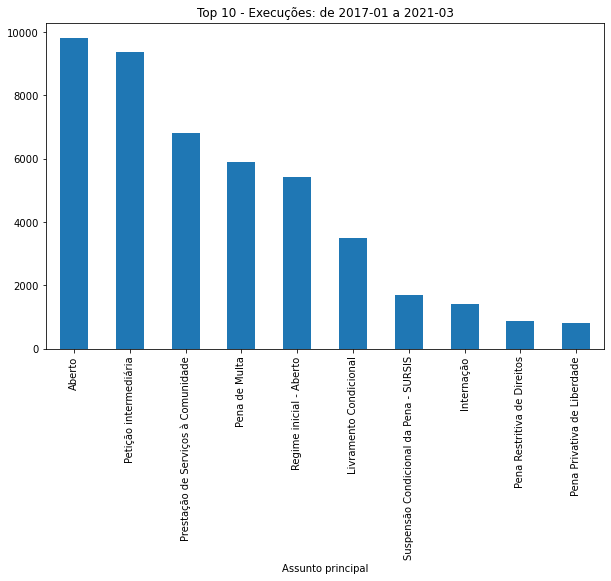

In [24]:
plota_barras (contagem_de_assuntos_exec.nlargest(10), 'Top 10 - Execuções', periodo)

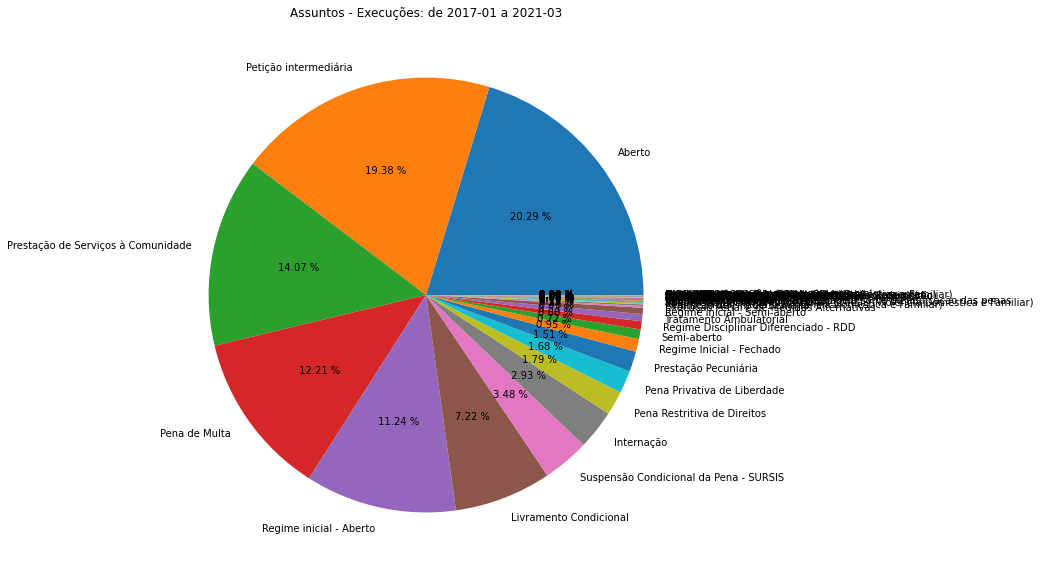

<Figure size 432x288 with 0 Axes>

In [25]:
plota_pizza(contagem_de_assuntos_exec, 'Assuntos - Execuções', periodo)

In [26]:
# Varas Especializadas
criterio = atos_periodo['Vara'].isin(sel_varas_especializadas)
contagem_de_assuntos_esp = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_esp.head(50)

Assunto principal
Decorrente de Violência Doméstica                                                         5150
Ameaça                                                                                    3940
Estupro de vulnerável                                                                     3789
Contravenções Penais                                                                      2702
Crimes contra a Ordem Tributária                                                          2338
Leve                                                                                      1924
Injúria                                                                                   1230
Posse de Drogas para Consumo Pessoal                                                      1224
Lesão Corporal                                                                             955
Estupro                                                                                    935
Receptação culposa              

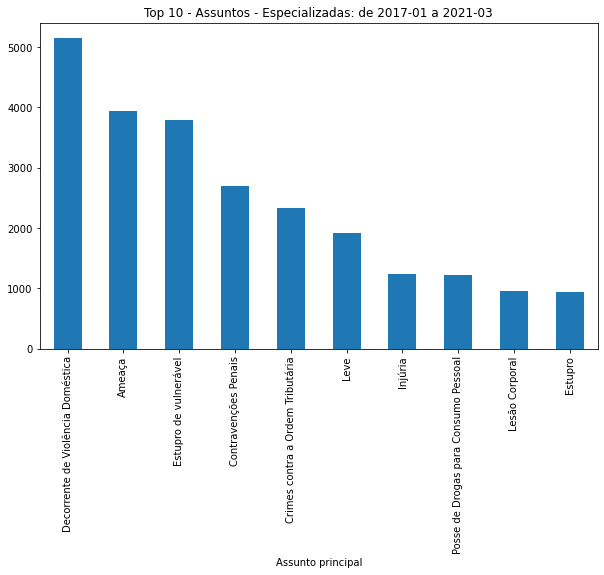

In [27]:
plota_barras (contagem_de_assuntos_esp.nlargest(10), 'Top 10 - Assuntos - Especializadas', periodo)

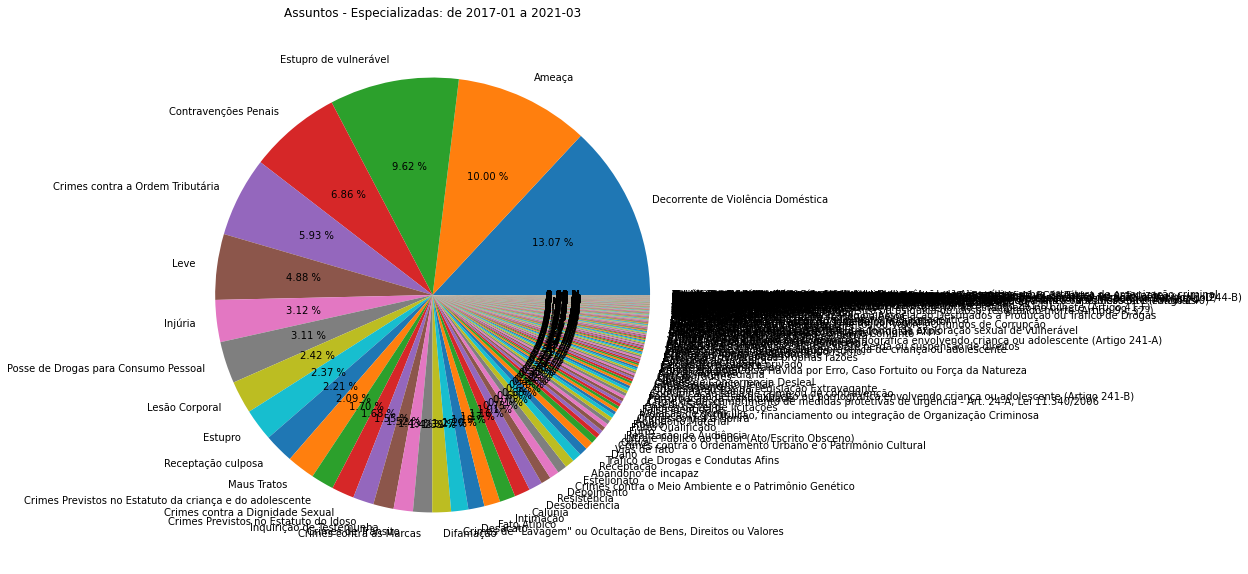

<Figure size 432x288 with 0 Axes>

In [28]:
plota_pizza(contagem_de_assuntos_esp, 'Assuntos - Especializadas', periodo)

In [29]:
atos['Especialização'].unique()

array(['Criminal - 20ª VCrim', 'Criminal - 27ª VCrim',
       'Execuções Criminais', 'Criminal - 18ª VCrim', 'Criminal',
       'Criminal - 30ª VCrim', 'Criminal - 19ª VCrim', 'GEVID',
       'Criminal - 6ª VCrim', 'Criminal - 14ª VCrim',
       'Criminal - 32ª VCrim', 'Criminal - 8ª VCrim', 'Jecrim',
       'Criminal - 22ª VCrim', 'Criminal - 26ª VCrim',
       'SANCTVS - Plantão PJ SANCTVS', 'Criminal - 21ª VCrim',
       'Criminal - 10ª VCrim', 'Criminal - 5ª VCrim',
       'Criminal - 2ª VCrim', 'Criminal - 24ª VCrim',
       'Criminal - 4ª VCrim', 'Criminal - 12ª VCrim',
       'Criminal - 25ª VCrim', 'Criminal - 31ª VCrim',
       'Criminal - 13ª VCrim', 'Criminal - 17ª VCrim',
       'Criminal - 11ª VCrim', 'Criminal - 16ª VCrim',
       'Criminal - 23ª VCrim', 'Criminal - 1ª VCrim',
       'Criminal - 9ª VCrim', 'Criminal - 7ª VCrim',
       'Criminal - 29ª VCrim', 'GECEP', 'Sonegação Fiscal',
       'Criminal - 28ª VCrim', 'GECAP', 'Criminal - 15ª VCrim',
       'Criminal - 3ª

In [30]:
# Assuntos por Especialização
sel_especializacao = ['GAECO','CYBERGAECO']
criterio = atos_periodo['Especialização'].isin(sel_especializacao)
contagem_de_assuntos_mp_espec = atos_periodo[criterio].groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_mp_espec.head(50)

Assunto principal
Promoção, constituição, financiamento ou integração de Organização Criminosa                   74
Crimes de "Lavagem" ou Ocultação de Bens, Direitos ou Valores                                  49
Tráfico de Drogas e Condutas Afins                                                             30
Quadrilha ou Bando                                                                             10
Corrupção passiva                                                                               9
Crimes Previstos na Legislação Extravagante                                                     7
Corrupção ativa                                                                                 7
Crimes contra a Ordem Tributária                                                                6
Petição intermediária                                                                           6
Sigilo Telefônico                                                                               5
Vi

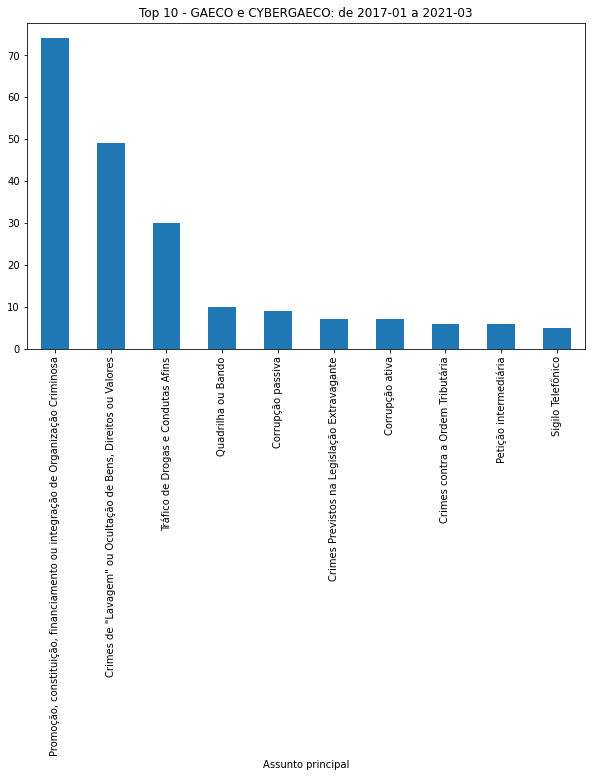

In [31]:
plota_barras (contagem_de_assuntos_mp_espec.nlargest(10), 'Top 10 - GAECO e CYBERGAECO', periodo)

In [32]:
# Assuntos por Promotor de Justiça
sel_id = 'e4c5ac5fccce47ed813487092caed49b'
criterio = (atos_periodo['Id_colega'] == sel_id)
atos_pj = atos_periodo[criterio]

In [33]:
# Análise do volume total de interações no período
total_pj = atos_pj.groupby('mês_ano')['Recebido por'].count().to_frame()
total_pj

,Recebido por
mês_ano,
2017-01,87
2017-02,81
2017-03,130
2017-04,99
2017-05,144
2017-06,123
2017-07,96
2017-08,141
2017-09,104


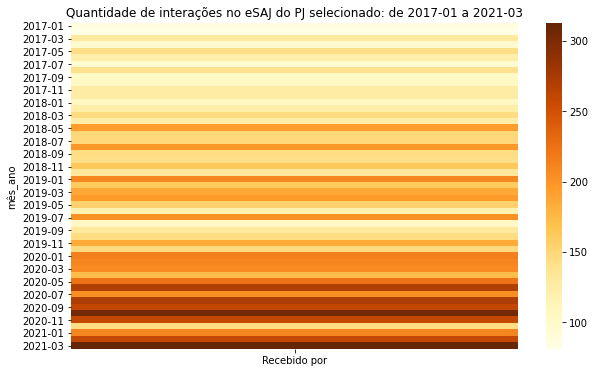

In [34]:
# Gráfico de calor 
plota_calor(total_pj,'Quantidade de interações no eSAJ do PJ selecionado', periodo)

In [35]:
criterio = atos_periodo['Id_colega'] == sel_id
contagem_de_assuntos_pj = atos_pj.groupby('Assunto principal')['Número do processo'].nunique().sort_values(ascending=False)
contagem_de_assuntos_pj.head(30)

Assunto principal
Roubo                                                      638
Tráfico de Drogas e Condutas Afins                         497
Furto Qualificado                                          466
Receptação                                                 330
Estelionato                                                298
Furto                                                      297
Intimação                                                   77
Inquirição de Testemunha                                    76
Adulteração de Sinal Identificador de Veículo Automotor     61
Crimes do Sistema Nacional de Armas                         58
Crimes de Trânsito                                          56
Uso de documento falso                                      55
Apropriação indébita                                        50
Falsidade ideológica                                        38
Fato Atípico                                                34
Citação                              

<AxesSubplot:title={'center':'Promotor: e4c5ac5fccce47ed813487092caed49b'}, xlabel='mês_ano'>

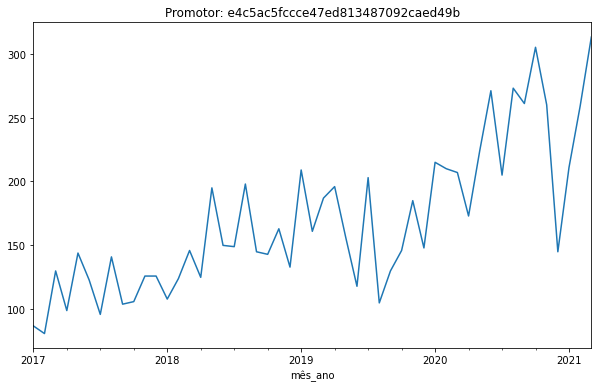

In [36]:
total_pj.plot(figsize=(10,6),legend='', title='Promotor: ' + sel_id)

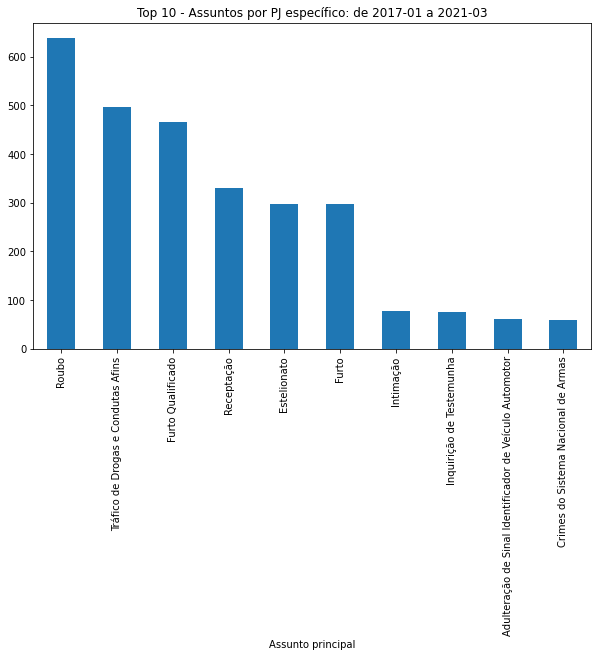

In [37]:
plota_barras (contagem_de_assuntos_pj.nlargest(10), 'Top 10 - Assuntos por PJ específico', periodo)

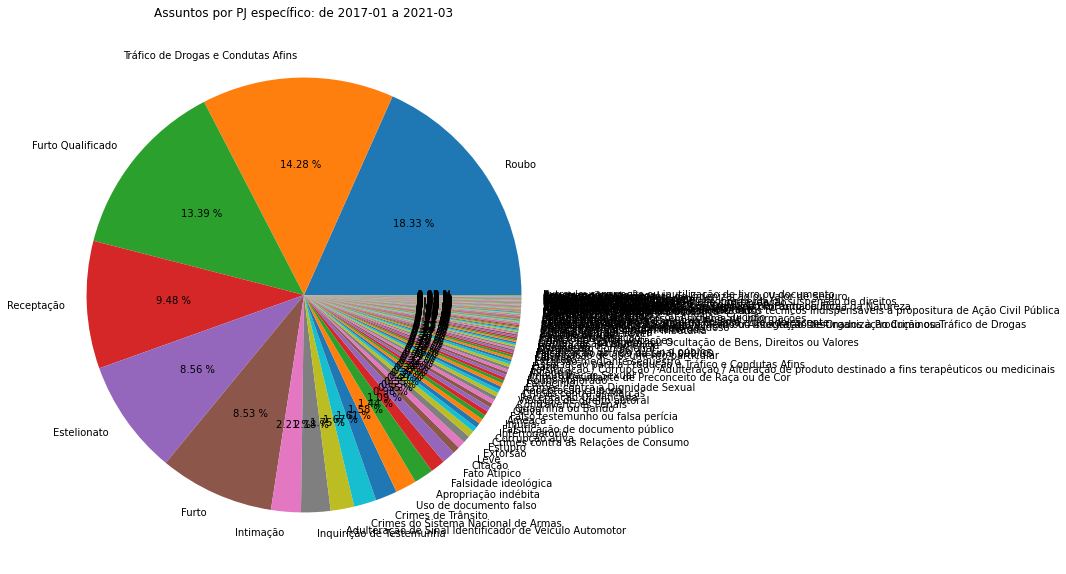

<Figure size 432x288 with 0 Axes>

In [38]:
plota_pizza(contagem_de_assuntos_pj, 'Assuntos por PJ específico', periodo)

In [39]:
# Análise do volume total de interações no período por assunto e PJ específico
total_ind_proc = atos_pj.groupby(['mês_ano', 'Assunto principal','Número do processo'])['Número do processo'].count().to_frame()
total_ind_proc

Número do processo
mês_ano Assunto principal                   Número do processo                           
2017-01 Crimes contra a Honra               1000914-38.2016.8.26.0050                   1
        Crimes de Trânsito                  0012242-70.2016.8.26.0635                   1
        Crimes do Sistema Nacional de Armas 0007782-49.2016.8.26.0050                   1
                                            0009577-81.2016.8.26.0635                   1
                                            0014185-34.2016.8.26.0050                   1
...                                                                                   ...
2021-03 Tráfico de Drogas e Condutas Afins  1531011-07.2019.8.26.0228                   1
        Uso de documento falso              0082904-97.2018.8.26.0050                   1
                                            1537724-47.2019.8.26.0050                   1
        Violação de direito autoral         0008916-14.2016.8.26.0050                   1
                                            1522617-26.2020.8.26.0050                   1

[7217 rows x 1 columns]

In [40]:
# Análise do volume total de interações no período por PJ específico, excluídos os retornos do mesmo processo
total_ind_proc_s_retorno = atos_pj.groupby(['mês_ano', 'Assunto principal'])['Número do processo'].nunique().to_frame()
total_ind_proc_s_retorno

Número do processo
mês_ano Assunto principal                                      
2017-01 Crimes contra a Honra                                 1
        Crimes de Trânsito                                    1
        Crimes do Sistema Nacional de Armas                   7
        Estelionato                                           2
        Falsidade ideológica                                  1
...                                                         ...
2021-03 Seqüestro e cárcere privado                           2
        Supressão de documento                                1
        Tráfico de Drogas e Condutas Afins                   39
        Uso de documento falso                                2
        Violação de direito autoral                           2

[1365 rows x 1 columns]

In [41]:
maior_incidencia = contagem_de_assuntos_pj.nlargest(5)
lista_de_crimes = maior_incidencia.index
maior_incidencia

Assunto principal
Roubo                                 638
Tráfico de Drogas e Condutas Afins    497
Furto Qualificado                     466
Receptação                            330
Estelionato                           298
Name: Número do processo, dtype: int64

In [42]:
criterio = atos_pj['Assunto principal'].isin(lista_de_crimes)
atos_pj_selec = atos_pj[criterio]
atos_pj_selec = atos_pj_selec[['Assunto principal','Número do processo']]
atos_pj_selec.reset_index(inplace=True)
atos_pj_selec

,mês_ano,Assunto principal,Número do processo
0,2021-03,Tráfico de Drogas e Condutas Afins,1516110-97.2020.8.26.0228
1,2021-03,Tráfico de Drogas e Condutas Afins,1526237-94.2020.8.26.0228
2,2021-03,Furto Qualificado,1501817-74.2020.8.26.0050
3,2021-03,Roubo,1502417-80.2019.8.26.0228
4,2021-03,Receptação,1506716-32.2021.8.26.0228
...,...,...,...
5651,2017-01,Roubo,0011926-57.2016.8.26.0635
5652,2017-01,Roubo,0103826-33.2016.8.26.0050
5653,2017-01,Tráfico de Drogas e Condutas Afins,0003566-45.2016.8.26.0050
5654,2017-01,Tráfico de Drogas e Condutas Afins,0031049-50.2016.8.26.0050


In [43]:
atos_pj_selec_tot = atos_pj_selec.groupby(['mês_ano','Assunto principal'])['Número do processo'].count().to_frame()
atos_pj_selec_tot

Número do processo
mês_ano Assunto principal                                     
2017-01 Estelionato                                          2
        Furto Qualificado                                   16
        Receptação                                           8
        Roubo                                               25
        Tráfico de Drogas e Condutas Afins                  14
...                                                        ...
2021-03 Estelionato                                         50
        Furto Qualificado                                   34
        Receptação                                          24
        Roubo                                               41
        Tráfico de Drogas e Condutas Afins                  40

[255 rows x 1 columns]

In [44]:
atos_pj_selec_tot = pd.pivot_table(atos_pj_selec_tot, index='mês_ano', columns='Assunto principal').fillna(0)

In [45]:
atos_pj_selec_tot.sample(5)

Número do processo                                     \
Assunto principal        Estelionato Furto Qualificado Receptação Roubo   
mês_ano                                                                   
2019-11                           12                24         19    30   
2019-04                           25                28         26    36   
2017-02                            2                17          6    26   
2020-05                           25                30         15    44   
2019-02                           11                22          9    37   

                                                      
Assunto principal Tráfico de Drogas e Condutas Afins  
mês_ano                                               
2019-11                                           29  
2019-04                                           21  
2017-02                                           12  
2020-05                                           28  
2019-02                                           23

<AxesSubplot:title={'center':'Promotor: e4c5ac5fccce47ed813487092caed49b'}, xlabel='mês_ano'>

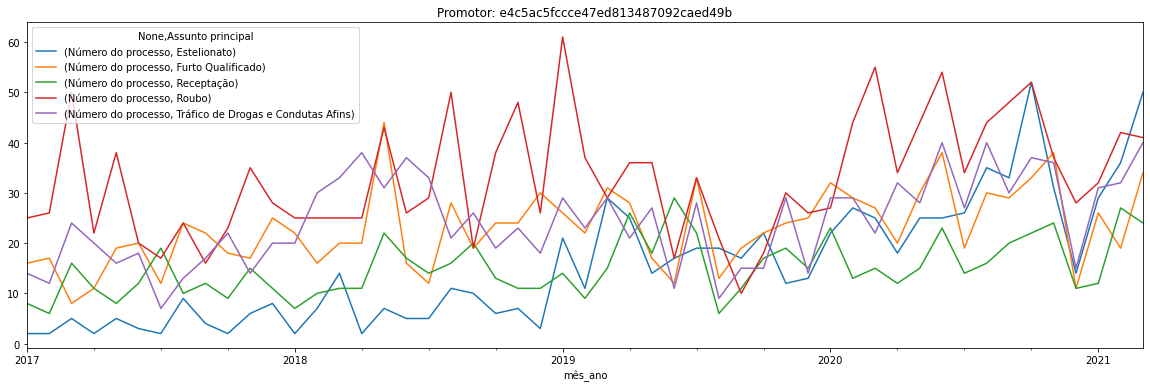

In [46]:
atos_pj_selec_tot.plot(figsize=(20,6), title='Promotor: ' + sel_id)